<a href="https://colab.research.google.com/github/Aabhiinavvv/Abhinav/blob/main/EmotionClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.15.0
!pip install scikit-learn
!pip install wordcloud

ERROR: Could not find a version that satisfies the requirement tensorflow==2.15.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.15.0


In [2]:
!pip install Keras-Preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout , LSTM,Embedding
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import nltk
import re
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud



In [4]:
import pandas as pd

train_data = pd.read_csv("/content/train.txt")



In [5]:
import pandas as pd
train_data = pd.read_csv(
    "/content/train.txt",
    header=None,
    sep=";",
    names=['Comment', 'Emotion'],
    encoding='utf-8'
)
train_data.head()

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
train_data['length']=[len(X) for X in train_data['Emotion']]


In [7]:
train_data.shape

(16000, 3)

In [8]:
train_data.isnull().sum()

,0
Comment,0
Emotion,0
length,0


In [9]:
train_data.head()
train_data.isnull().sum()


,0
Comment,0
Emotion,0
length,0


In [10]:
train_data.duplicated().sum()

np.int64(1)

In [11]:
train_data['Emotion'].value_counts()


,count
Emotion,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


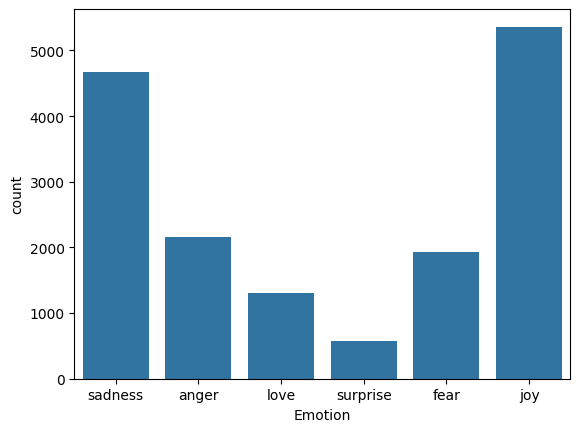

In [12]:
sns.countplot(x=train_data['Emotion'])
plt.show()

In [13]:
df2= train_data.copy()
length_values=df2['length'].values

In [14]:
length_values

array([7, 7, 5, ..., 3, 5, 7])

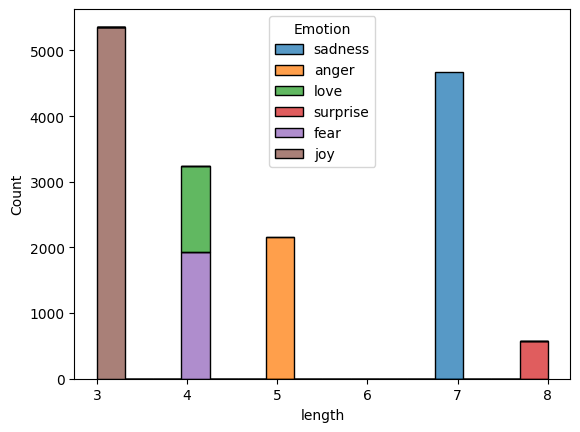

In [15]:
sns.histplot (data = df2 , x='length',hue='Emotion',multiple = 'stack')
plt.show()

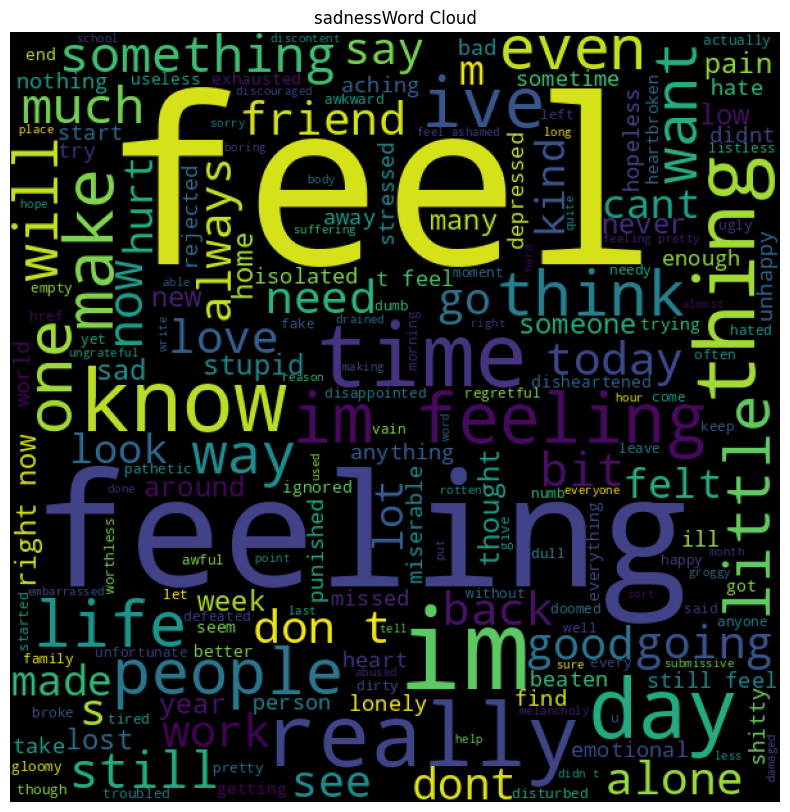

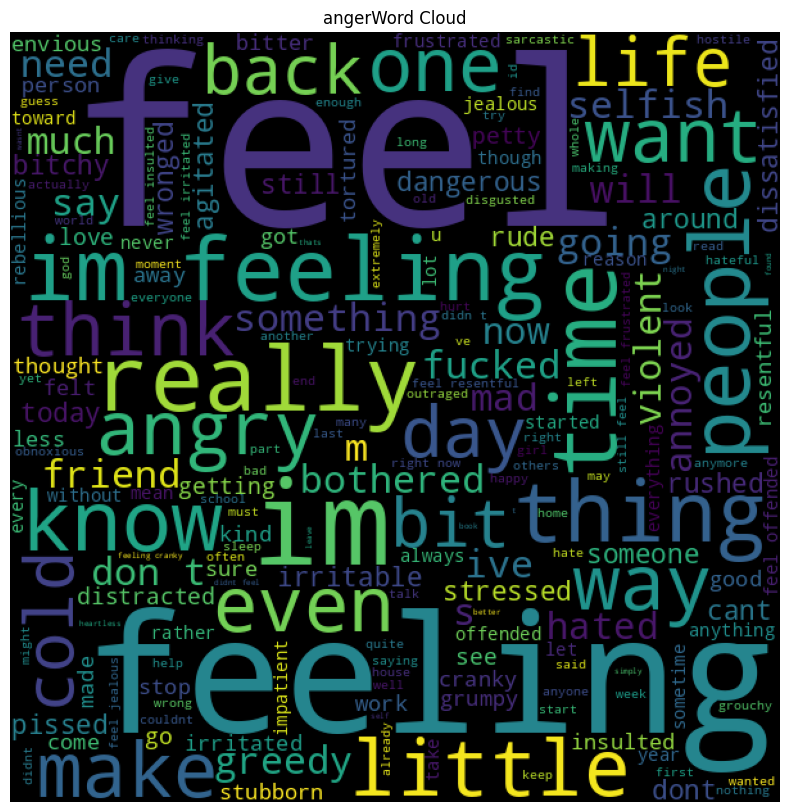

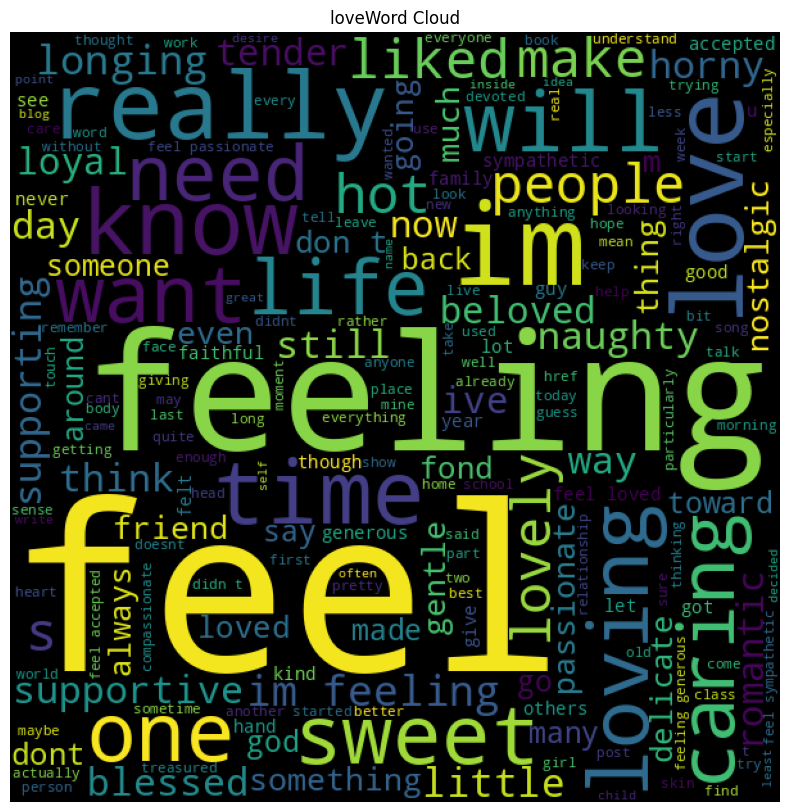

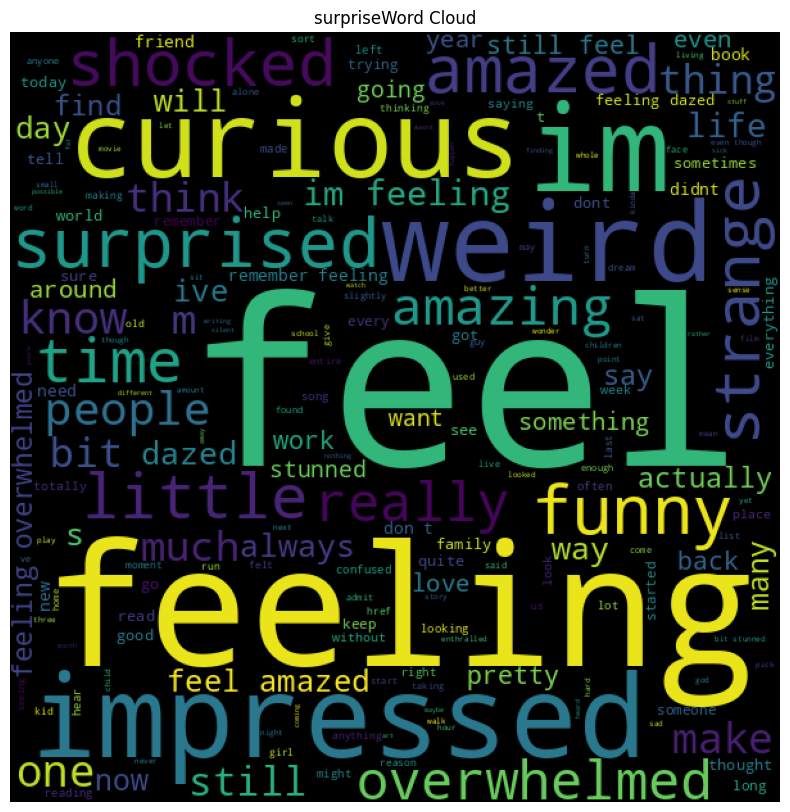

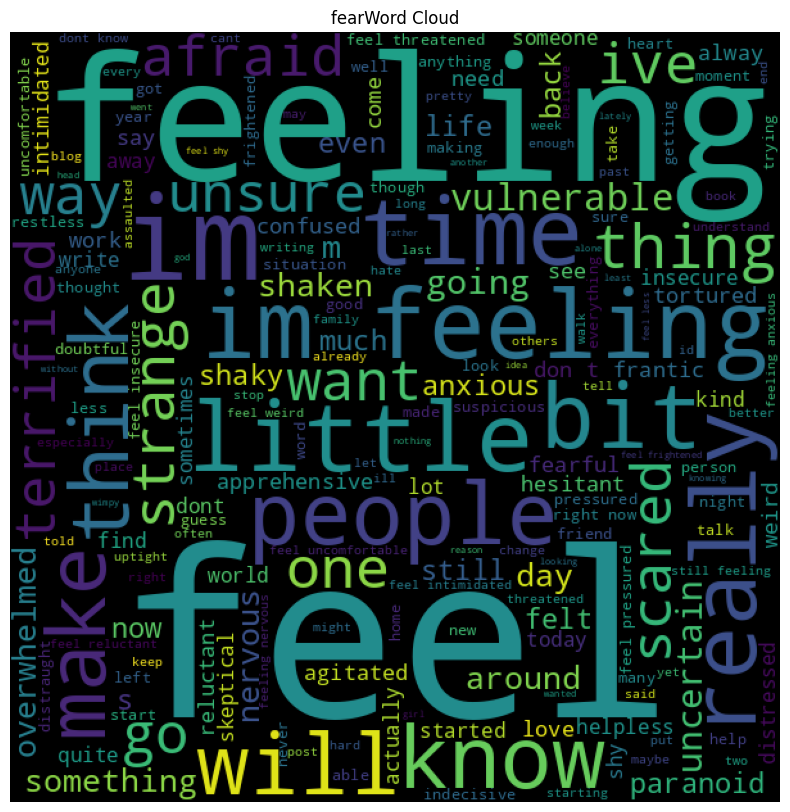

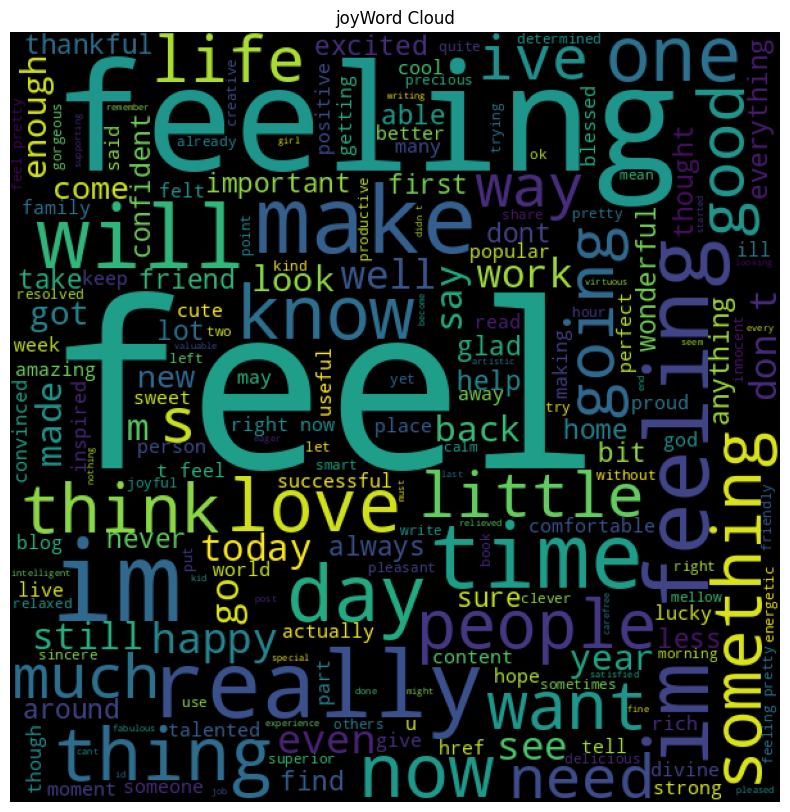

In [16]:
def words_cloud(wordcloud,df):
  plt.figure(figsize=(10,10))
  plt.title(emotion + "Word Cloud")
  plt.imshow(wordcloud)
  plt.axis('off')
emotion_list = train_data['Emotion'].unique()
for emotion in emotion_list:
  text = " ".join([sentense for sentense in train_data.loc[train_data['Emotion']==emotion,'Comment']])
  wordcloud = WordCloud(width=600, height=600).generate(text)
  words_cloud(wordcloud,emotion)


In [17]:
lb = LabelEncoder()
train_data['emotion_encoder'] =lb.fit_transform(train_data['Emotion'])

In [18]:
train_data

,Comment,Emotion,length,emotion_encoder
0,i didnt feel humiliated,sadness,7,4
1,i can go from feeling so hopeless to so damned...,sadness,7,4
2,im grabbing a minute to post i feel greedy wrong,anger,5,0
3,i am ever feeling nostalgic about the fireplac...,love,4,3
4,i am feeling grouchy,anger,5,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,7,4
15996,i am now turning and i feel pathetic that i am...,sadness,7,4
15997,i feel strong and good overall,joy,3,2
15998,i feel like this was such a rude comment and i...,anger,5,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [20]:
df = train_data.copy()

In [21]:
df

,Comment,Emotion,length,emotion_encoder
0,i didnt feel humiliated,sadness,7,4
1,i can go from feeling so hopeless to so damned...,sadness,7,4
2,im grabbing a minute to post i feel greedy wrong,anger,5,0
3,i am ever feeling nostalgic about the fireplac...,love,4,3
4,i am feeling grouchy,anger,5,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,7,4
15996,i am now turning and i feel pathetic that i am...,sadness,7,4
15997,i feel strong and good overall,joy,3,2
15998,i feel like this was such a rude comment and i...,anger,5,0


In [22]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
stopwards = set(nltk.corpus.stopwords.words('english'))
def clean_text(text):
  stemmer = PorterStemmer()
  text = re.sub("[^a-zA-Z]"," ",text)
  text = text.lower()
  text = text.split()
  text = [stemmer.stem(word) for word in text if word not in stopwards]
  return " ".join(text)

df['cleaned_comment'] = df['Comment'].apply(clean_text)


In [24]:
df

,Comment,Emotion,length,emotion_encoder,cleaned_comment
0,i didnt feel humiliated,sadness,7,4,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,7,4,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,5,0,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,4,3,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,5,0,feel grouchi
...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,7,4,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,sadness,7,4,turn feel pathet still wait tabl sub teach degre
15997,i feel strong and good overall,joy,3,2,feel strong good overal
15998,i feel like this was such a rude comment and i...,anger,5,0,feel like rude comment im glad


In [25]:
X_train, X_test ,Y_train , Y_test = train_test_split(df['cleaned_comment'],df['emotion_encoder'] ,test_size = 0.2,random_state=42)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel="linear")
}

for name, clf in classifiers.items():
    print(f"\n======== {name} ========")

    clf.fit(X_train_tfidf, Y_train)
    Y_pred = clf.predict(X_test_tfidf)

    print("Classification Report:")
    print(classification_report(Y_test, Y_pred))

    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy: {accuracy:.4f}")



======== Multinomial Naive Bayes ========
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.31      0.46       427
           1       0.91      0.24      0.38       397
           2       0.58      0.98      0.73      1021
           3       1.00      0.03      0.06       296
           4       0.70      0.91      0.79       946
           5       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.85      0.41      0.41      3200
weighted avg       0.76      0.66      0.58      3200

Accuracy: 0.6550

======== Logistic Regression ========
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       427
           1       0.84      0.73      0.78       397
           2       0.78      0.94      0.85      1021
           3       0.80      0.49      0.61       296
           4       0.88      0.92      0.

In [28]:
lg = LogisticRegression()
lg.fit(X_train_tfidf,Y_train)
y_pred_lg = lg.predict(X_test_tfidf)

In [29]:
import numpy as np

def predict_emotion(input_text):
    cleaned_text = clean_text(input_text)

    # Vectorize (must be a list)
    input_vectorized = tfidf_vectorizer.transform([cleaned_text])

    # Predict label
    predicted_label = lg.predict(input_vectorized)[0]

    # Convert label to emotion
    predicted_emotion = lb.inverse_transform([predicted_label])[0]

    return predicted_emotion, predicted_label


sentences = [
    "i didn't feel humiliated",
    "i feel strong and good overall",
    "i am grabbing a minute to post i feel greedy wrong",
    "he was speechless when he found out he was accepted to this new job",
    "this is outrageous, how can you talk like this",
    "i feel like i am all alone in this world",
    "he is really sweet and caring",
    "you made me very crazy",
    "i am feeling nostalgic about the fireplace",
    "i'm feeling very grouchy",
    "he hates you"
]

for sent in sentences:
    emotion, label = predict_emotion(sent)
    print(f"\nSentence: {sent}")
    print(f"Predicted Emotion: {emotion}")
    print(f"Predicted Label: {label}")



Sentence: i didn't feel humiliated
Predicted Emotion: sadness
Predicted Label: 4

Sentence: i feel strong and good overall
Predicted Emotion: joy
Predicted Label: 2

Sentence: i am grabbing a minute to post i feel greedy wrong
Predicted Emotion: anger
Predicted Label: 0

Sentence: he was speechless when he found out he was accepted to this new job
Predicted Emotion: joy
Predicted Label: 2

Sentence: this is outrageous, how can you talk like this
Predicted Emotion: anger
Predicted Label: 0

Sentence: i feel like i am all alone in this world
Predicted Emotion: sadness
Predicted Label: 4

Sentence: he is really sweet and caring
Predicted Emotion: love
Predicted Label: 3

Sentence: you made me very crazy
Predicted Emotion: sadness
Predicted Label: 4

Sentence: i am feeling nostalgic about the fireplace
Predicted Emotion: love
Predicted Label: 3

Sentence: i'm feeling very grouchy
Predicted Emotion: anger
Predicted Label: 0

Sentence: he hates you
Predicted Emotion: anger
Predicted Label: 

In [30]:
import pickle
pickle.dump(lg,open("logestic_regression.pkl",'wb'))
pickle.dump(lg,open("label_encoder.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf_vectorizer.pkl",'wb'))


In [31]:
import sklearn

In [32]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [33]:
import nltk
import re

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re


In [43]:
def clean_text(df, column, tokenizer, max_len):
    corpus = []

    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        corpus.append(text)

    sequences = tokenizer.texts_to_sequences(corpus)

    padded_sequences = pad_sequences(
        sequences,
        maxlen=max_len,
        padding="pre",
        truncating="pre"
    )

    return padded_sequences


In [44]:
vocab_size = 11000
max_len = 300

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data["Comment"])

X_train = clean_text(train_data, "Comment", tokenizer, max_len)


In [45]:
train_data['Emotion']

,Emotion
0,4
1,4
2,0
3,3
4,0
...,...
15995,4
15996,4
15997,2
15998,0


In [46]:
lb = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])


In [47]:
to_categorical(train_data['Emotion'])

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [48]:
print(type(X_train))
print(X_train.shape)
print(X_train.dtype)

print(type(Y_train))
print(Y_train.shape)
print(Y_train.dtype)


<class 'numpy.ndarray'>
(16000, 300)
int32
<class 'pandas.core.series.Series'>
(12800,)
int64


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=11000, output_dim=150, input_length=300),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(6, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # use this if labels are integers
    metrics=["accuracy"]
)

model.summary()

model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.3075 - loss: 1.6372

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 3200
'y' sizes: 0


In [50]:
print(type(Y_train))
print(len(Y_train))
print(Y_train[:10])


<class 'pandas.core.series.Series'>
12800
676      2
12113    4
7077     3
13005    4
12123    0
921      4
9902     3
1182     4
8861     3
15533    2
Name: emotion_encoder, dtype: int64
